# With Dataset but without fancyImpute

In [22]:
#Load libraries
import os
import pandas as pd
import numpy as np
#from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [23]:
#Load data
marketing_train = pd.read_csv("marketing_tr.csv")
marketing_train.head(10)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no
5,47.0,blue-collar,married,basic.4y,no,yes,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
6,35.0,services,single,NaN,no,yes,no,telephone,may,tue,...,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,999.0,0,yes
7,NaN,services,married,high.school,no,yes,no,telephone,may,wed,...,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,999.0,0,no
8,28.0,unemployed,married,basic.9y,no,yes,no,cellular,may,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,999.0,0,no
9,46.0,blue-collar,married,basic.9y,no,yes,no,cellular,nov,mon,...,1,failure,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no


# EDA

In [24]:
#Exploratory Data Analysis
marketing_train['schooling'] = marketing_train['schooling'].replace("illiterate", "unknown")
marketing_train['schooling'] = marketing_train['schooling'].replace(["basic.4y","basic.6y","basic.9y","high.school","professional.course"], "high.school")
marketing_train['default'] = marketing_train['default'].replace("yes", "unknown")
marketing_train['marital'] = marketing_train['marital'].replace("unknown", "married")
marketing_train['month'] = marketing_train['month'].replace(["sep","oct","mar","dec"], "dec")
marketing_train['month'] = marketing_train['month'].replace(["aug","jul","jun","may","nov"], "jun")
marketing_train['loan'] = marketing_train['loan'].replace("unknown", "no")
marketing_train['profession'] = marketing_train['profession'].replace(["management","unknown","unemployed","admin."], "admin.")
marketing_train['profession'] = marketing_train['profession'].replace(["blue-collar","housemaid","services","self-employed","entrepreneur","technician"], "blue-collar")

# MISSING VALUE ANALYSIS

In [25]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(marketing_train.isnull().sum())
#missing_val
#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(marketing_train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

In [26]:
marketing_train['custAge'].loc[70] = np.nan

C:\Users\ankita\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
#Assigning levels to the categories
lis = []
for i in range(0, marketing_train.shape[1]):
    #print(i)
    #print(marketing_train.iloc[:,i])
    if(marketing_train.iloc[:,i].dtypes == 'object'): #[allrows, nthcol] type is 'object'
        marketing_train.iloc[:,i] = pd.Categorical(marketing_train.iloc[:,i]) #covert col to categoryal variable

        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].cat.codes #make category of observation
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].astype('object')
        
        lis.append(marketing_train.columns[i])
lis 

['profession',
 'marital',
 'schooling',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'responded']

In [28]:
#replace -1 with NA to impute
for i in range(0, marketing_train.shape[1]):
    marketing_train.iloc[:,i] = marketing_train.iloc[:,i].replace(-1, np.nan) 

In [29]:
marketing_train = marketing_train.fillna(marketing_train.median())
marketing_train['custAge'].loc[70]

38.0

In [30]:
df = marketing_train.copy()
marketing_train = df.copy()
marketing_train

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,0,2,1.0,1,0,0,0,2,1.0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,38.0,1,1,0.0,0,0,0,0,2,1.0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.0,1,1,0.0,0,0,0,1,2,1.0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.0,0,0,0.0,1,2,1,0,2,4.0,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,38.0,0,0,1.0,0,2,0,0,2,3.0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0
5,47.0,1,1,0.0,0,2,0,1,2,0.0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
6,35.0,1,2,0.0,0,2,0,1,2,3.0,...,0,1,1.1,93.994,-36.4,4.856,5191.0,999.0,0,1
7,38.0,1,1,0.0,0,2,0,1,2,4.0,...,0,1,1.1,93.994,-36.4,4.856,5191.0,999.0,0,0
8,28.0,0,1,0.0,0,2,0,0,2,0.0,...,0,1,-1.8,92.893,-46.2,1.313,5099.1,999.0,0,0
9,46.0,1,1,0.0,0,2,0,0,2,1.0,...,1,0,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0


# Outlier Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x2736d7cd748>,
 'caps': [<matplotlib.lines.Line2D at 0x2736d7cde48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2736d7cd320>],
 'medians': [<matplotlib.lines.Line2D at 0x2736dc92518>],
 'fliers': [<matplotlib.lines.Line2D at 0x2736dc92860>],
 'means': []}

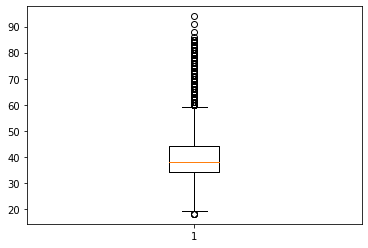

In [31]:
# #Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(marketing_train['custAge'])

In [32]:
#Detect and replace with NA
# #Extract quartiles
q75, q25 = np.percentile(marketing_train['custAge'], [75 ,25])

#Calculate IQR
iqr = q75 - q25

#Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

#Replace with NA
marketing_train.loc[marketing_train['custAge'] < minimum,:'custAge'] = np.nan
marketing_train.loc[marketing_train['custAge'] > maximum,:'custAge'] = np.nan

#Calculate missing value
missing_val = pd.DataFrame(marketing_train.isnull().sum())

#Impute with KNN
marketing_train = marketing_train.fillna(marketing_train.median())

{'whiskers': [<matplotlib.lines.Line2D at 0x2736dcb8438>,
 'caps': [<matplotlib.lines.Line2D at 0x2736dce89e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2736dcddeb8>],
 'medians': [<matplotlib.lines.Line2D at 0x2736dce8e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2736dcf3400>],
 'means': []}

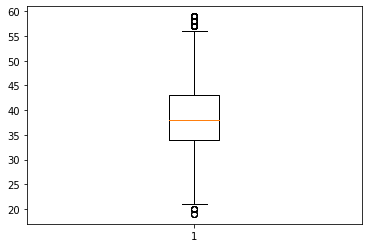

In [33]:
# #Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(marketing_train['custAge'])

# Feature Selection
 1.correlation
 2.chi square test

In [34]:
#save numeric names
cnames =  ["custAge", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m",
           "nr.employed", "pmonths", "pastEmail"]

In [35]:
##Correlation analysis
#Correlation plot
df_corr = marketing_train.loc[:,cnames]
df_corr

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,55.0,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,999.0,0
1,38.0,1,999,0,1.4,93.918,-42.7,4.960,5228.1,999.0,0
2,42.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,999.0,0
3,55.0,2,999,0,1.4,93.918,-42.7,4.962,5228.1,999.0,0
4,38.0,5,999,1,-1.8,92.893,-46.2,1.291,5099.1,999.0,1
5,47.0,1,999,0,1.1,93.994,-36.4,4.857,5191.0,999.0,0
6,35.0,1,999,0,1.1,93.994,-36.4,4.856,5191.0,999.0,0
7,38.0,2,999,0,1.1,93.994,-36.4,4.856,5191.0,999.0,0
8,28.0,1,999,0,-1.8,92.893,-46.2,1.313,5099.1,999.0,0
9,46.0,2,999,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0


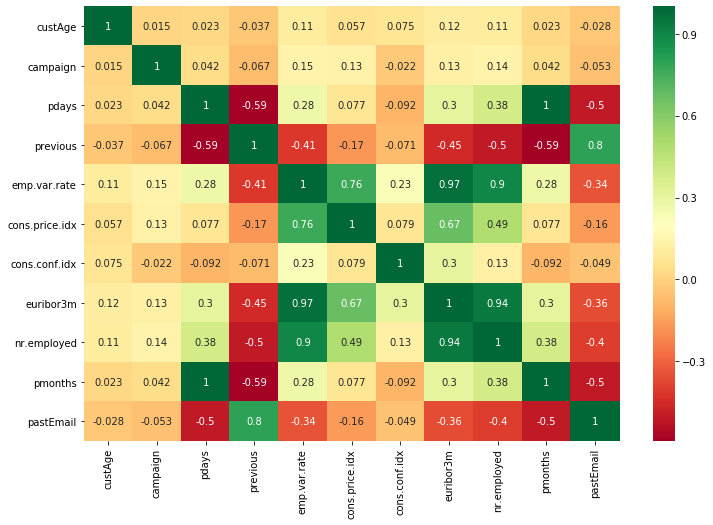

In [36]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(12, 8))

#Generate correlation matrix
corr = df_corr.corr()
corr
#Plot using seaborn library
g=sns.heatmap(df_corr.corr(),annot=True,cmap="RdYlGn")
# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

In [37]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["profession", "marital", "schooling", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

In [38]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(marketing_train['responded'], marketing_train[i]))
    print(p)

profession
1.6242589537712605e-34
marital
4.693435664866768e-05
schooling
0.0001581063227418203
default
1.626010224096433e-15
housing
0.5469213692385477
loan
0.09547438986454948
contact
4.416434113838791e-36
month
3.3492292613263237e-139
day_of_week
0.08335218479247931
poutcome
3.898575747043989e-181


In [39]:
marketing_train = marketing_train.drop(['pdays', 'emp.var.rate', 'day_of_week', 'loan', 'housing'], axis=1)

In [40]:
marketing_train

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,0,2,1.0,1,0,2,1,0,1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,38.0,1,1,0.0,0,0,2,1,0,1,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.0,1,1,0.0,0,1,2,1,0,1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.0,0,0,0.0,1,0,2,2,0,1,93.918,-42.7,4.962,5228.1,999.0,0,0
4,38.0,0,0,1.0,0,0,2,5,1,0,92.893,-46.2,1.291,5099.1,999.0,1,0
5,47.0,1,1,0.0,0,1,2,1,0,1,93.994,-36.4,4.857,5191.0,999.0,0,0
6,35.0,1,2,0.0,0,1,2,1,0,1,93.994,-36.4,4.856,5191.0,999.0,0,1
7,38.0,1,1,0.0,0,1,2,2,0,1,93.994,-36.4,4.856,5191.0,999.0,0,0
8,28.0,0,1,0.0,0,0,2,1,0,1,92.893,-46.2,1.313,5099.1,999.0,0,0
9,46.0,1,1,0.0,0,0,2,2,1,0,93.200,-42.0,4.191,5195.8,999.0,0,0


# Feature Scalling

In [41]:
df = marketing_train.copy()
marketing_train = df.copy()
marketing_train

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,0,2,1.0,1,0,2,1,0,1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,38.0,1,1,0.0,0,0,2,1,0,1,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.0,1,1,0.0,0,1,2,1,0,1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.0,0,0,0.0,1,0,2,2,0,1,93.918,-42.7,4.962,5228.1,999.0,0,0
4,38.0,0,0,1.0,0,0,2,5,1,0,92.893,-46.2,1.291,5099.1,999.0,1,0
5,47.0,1,1,0.0,0,1,2,1,0,1,93.994,-36.4,4.857,5191.0,999.0,0,0
6,35.0,1,2,0.0,0,1,2,1,0,1,93.994,-36.4,4.856,5191.0,999.0,0,1
7,38.0,1,1,0.0,0,1,2,2,0,1,93.994,-36.4,4.856,5191.0,999.0,0,0
8,28.0,0,1,0.0,0,0,2,1,0,1,92.893,-46.2,1.313,5099.1,999.0,0,0
9,46.0,1,1,0.0,0,0,2,2,1,0,93.200,-42.0,4.191,5195.8,999.0,0,0


(array([3.193e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.953e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.560e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.770e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.450e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.600e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        3.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+0

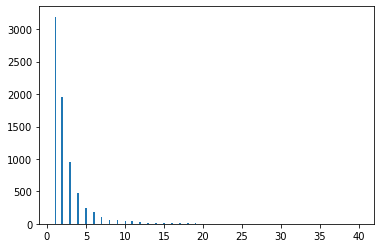

In [42]:
#Normality check
%matplotlib inline  
plt.hist(df['campaign'], bins='auto')

In [43]:
cnames = ["custAge","campaign","previous","cons.price.idx","cons.conf.idx","euribor3m","nr.employed",
           "pmonths","pastEmail"]
marketing_train['custAge']

0       55.0
1       38.0
2       42.0
3       55.0
4       38.0
5       47.0
6       35.0
7       38.0
8       28.0
9       46.0
10      38.0
11      41.0
12      35.0
13      49.0
14      38.0
15      40.0
16      32.0
17      46.0
18      38.0
19      34.0
20      38.0
21      32.0
22      31.0
23      26.0
24      28.0
25      30.0
26      38.0
27      38.0
28      47.0
29      37.0
        ... 
7384    46.0
7385    42.0
7386    38.0
7387    46.0
7388    38.0
7389    39.0
7390    44.0
7391    33.0
7392    29.0
7393    28.0
7394    38.0
7395    28.0
7396    44.0
7397    31.0
7398    38.0
7399    38.0
7400    38.0
7401    38.0
7402    57.0
7403    30.0
7404    56.0
7405    57.0
7406    26.0
7407    37.0
7408    35.0
7409    33.0
7410    45.0
7411    27.0
7412    51.0
7413    38.0
Name: custAge, Length: 7414, dtype: float64

In [44]:
#Nomalisation
for i in cnames:
    #print(i)
    
    marketing_train[i] = (marketing_train[i] - min(marketing_train[i]))/(max(marketing_train[i]) - min(marketing_train[i]))

In [45]:
# #Standarisation
for i in cnames:
    print(i)
    marketing_train[i] = (marketing_train[i] - marketing_train[i].mean())/marketing_train[i].std()
    marketing_train[i] 

custAge
campaign
previous
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
pmonths
pastEmail


In [46]:
marketing_train

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,2.057261,0,2,1.0,1,0,2,-0.563381,-0.356270,1,-0.640982,-0.309408,0.348370,0.418223,0.202109,-0.286829,0
1,-0.101626,1,1,0.0,0,0,2,-0.563381,-0.356270,1,0.600493,-0.459952,0.789092,0.860031,0.202109,-0.286829,0
2,0.406348,1,1,0.0,0,1,2,-0.563381,-0.356270,1,0.731902,0.894945,0.730062,0.352568,0.202109,-0.286829,0
3,2.057261,0,0,0.0,1,0,2,-0.192331,-0.356270,1,0.600493,-0.459952,0.790239,0.860031,0.202109,-0.286829,0
4,-0.101626,0,0,1.0,0,0,2,0.920818,1.578809,0,-1.171807,-1.212672,-1.313650,-0.904465,0.202109,0.505772,0
5,1.041315,1,1,0.0,0,1,2,-0.563381,-0.356270,1,0.731902,0.894945,0.730062,0.352568,0.202109,-0.286829,0
6,-0.482606,1,2,0.0,0,1,2,-0.563381,-0.356270,1,0.731902,0.894945,0.729489,0.352568,0.202109,-0.286829,1
7,-0.101626,1,1,0.0,0,1,2,-0.192331,-0.356270,1,0.731902,0.894945,0.729489,0.352568,0.202109,-0.286829,0
8,-1.371559,0,1,0.0,0,0,2,-0.563381,-0.356270,1,-1.171807,-1.212672,-1.301041,-0.904465,0.202109,-0.286829,0
9,0.914321,1,1,0.0,0,0,2,-0.192331,1.578809,0,-0.640982,-0.309408,0.348370,0.418223,0.202109,-0.286829,0


# Sampling

In [47]:
##Simple random sampling
Sim_Sampling = marketing_train.sample(2000)

In [48]:
# ##Systematic Sampling
# #Calculate the K value
print(len(marketing_train))
k = round(len(marketing_train)/1500)
print(k)
# Generate a random number using simple random sampling
RandNum = randrange(0, 5)
print(RandNum)
#select Kth observation starting from RandNum
Sys_Sampling = marketing_train.iloc[RandNum::k, :]

7414
5
4


In [49]:
# #Stratified sampling
from sklearn.model_selection import train_test_split
print(len(marketing_train))
#Select categorical variable
y = marketing_train['profession']

# select subset using stratified Sampling
Rest, Sample = train_test_split(marketing_train, test_size = 0.6, stratify = y)

7414


# Decision Tree Modelling

In [50]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [51]:
#replace target categories with Yes or No
marketing_train['responded'] = marketing_train['responded'].replace(0, 'No')
marketing_train['responded'] = marketing_train['responded'].replace(1, 'Yes')

In [52]:
#Divide data into train and test
X = marketing_train.values[:, 0:16]
Y = marketing_train.values[:,16]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [53]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)

#Create dot file to visualise tree  #http://webgraphviz.com/
# dotfile = open("pt.dot", 'w')
# df = tree.export_graphviz(C50_model, out_file=dotfile, feature_names = marketing_train.columns)

In [54]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Results
#Accuracy: 84.49
#FNR: 63

83.07484828051247

# Regression Modelling

In [55]:
X = marketing_train[['custAge','profession','marital','schooling','campaign']]
y = marketing_train['cons.price.idx']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm = LinearRegression()

In [60]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
# print the intercept
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

0.10037525100559219


,Coefficient
custAge,0.047430
profession,-0.006886
marital,-0.060150
schooling,-0.064958
campaign,0.125226


In [62]:
predictions = lm.predict(X_test)
CM = pd.crosstab(y_test, predictions)
CM

col_0,-0.324171592676358,-0.2880321943566895,-0.2712598043668808,-0.26351108336242995,-0.2566251063335655,-0.24930456411026186,-0.24716687215376842,-0.24586956298374285,-0.24457864022700937,-0.23855540717373125,...,0.7943380712394406,0.7999376868643703,0.861451817448287,0.8958702891695817,0.9027562661984461,0.9371747379197406,1.2009151721307791,1.2108015850917233,1.2813594551326863,1.491312138657202
cons.price.idx,,,,,,,,,,,,,,,,,,,,,
-2.368326,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
-2.060551,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
-1.970639,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
-1.904934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1.593701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1.483040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1.408690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1.258261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1.171807,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


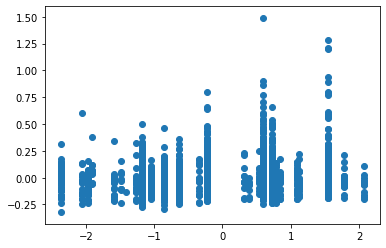

In [63]:
plt.scatter(y_test,predictions)

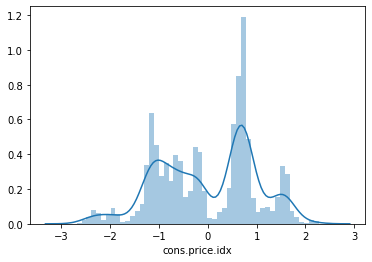

In [64]:
sns.distplot((y_test-predictions),bins=50);

In [65]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.869954710020003
MSE: 0.9936076728462627
RMSE: 0.9967987123016676


In [66]:
accuracy = lm.score(X_test,y_test)
print(accuracy*100,'%')

2.3804453119760427 %
